In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
from sklearn import datasets
from sklearn.svm import  SVC
import numpy as np
from sklearn.metrics import accuracy_score

In [7]:
data = pd.read_csv("HorrorCleanedCookies.csv")
data.info()

data["Rating_class"] = np.where(data["Rating"] > 4.0, 'good', 'mid')
data.info()
# X = data[["Year"]]
# y = data["Rating_class"]

X = data.iloc[0:1001, 2:4]
y = data.loc[0:1000, 'Rating_class']


svm = SVC(kernel = 'linear', random_state=1, gamma=0.05, C = 1)

svm.fit(X,y)

y_pred = svm.predict(X)
print("Accuracy score: " + str(accuracy_score(y, y_pred)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1249 non-null   object 
 1   Author  1249 non-null   object 
 2   Year    1249 non-null   int64  
 3   Rating  1249 non-null   float64
 4   Raters  1249 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1249 non-null   object 
 1   Author        1249 non-null   object 
 2   Year          1249 non-null   int64  
 3   Rating        1249 non-null   float64
 4   Raters        1249 non-null   int64  
 5   Rating_class  1249 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.7+ KB
Accuracy score: 0.8931068931068931


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1249 non-null   object 
 1   Author        1249 non-null   object 
 2   Year          1249 non-null   int64  
 3   Rating        1249 non-null   float64
 4   Raters        1249 non-null   int64  
 5   Rating_class  1249 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.7+ KB
0


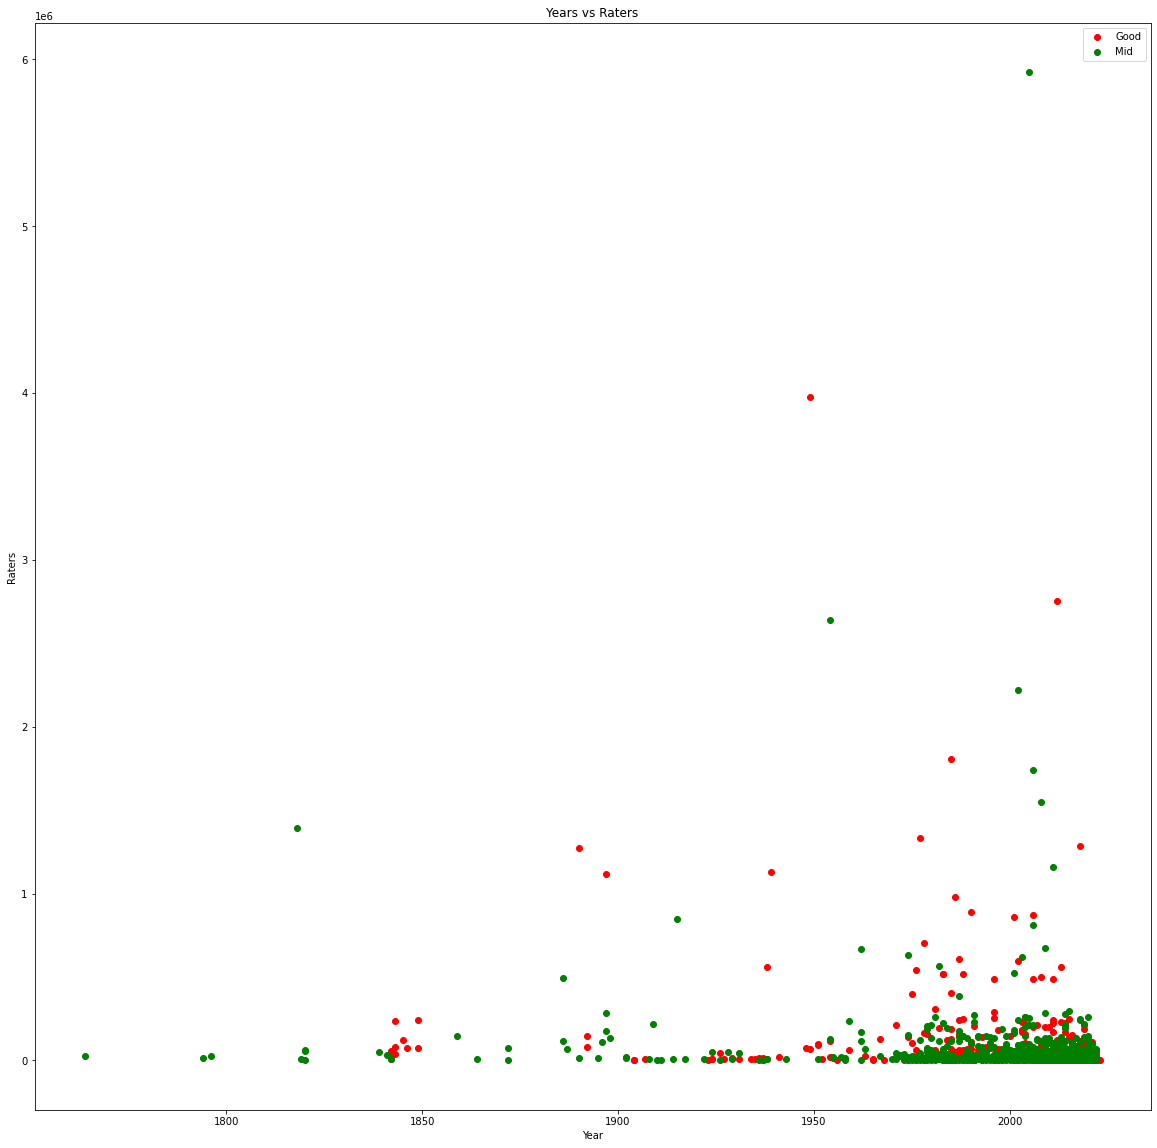

In [8]:
data.info()

# ddf.plot(kind= "scatter", x=)
fig, ax = plt.subplots(figsize=(20,20))

x = data[["Year", "Rating_class"]]
y = data[["Raters", "Rating_class"]]
z = data["Rating_class"]

ax.scatter(x[x["Rating_class"]== "good"]["Year"], y[y["Rating_class"]== "good"]["Raters"], color = "red", label = "Good")
ax.scatter(x[x["Rating_class"]== "mid"]["Year"], y[y["Rating_class"]== "mid"]["Raters"], color = "green", label = "Mid")
ax.legend()

print(len(data[data['Title'] == "Missing"]))
pd.DataFrame.dropna

ax.set_xlabel('Year')
ax.set_ylabel('Raters')
ax.set_title('Years vs Raters')

plt.show()

We tried to mess with the kernel, gamma, and c. But there are no significant difference. 
For "poly", it won't stop running and I had to stop it in the minute of 43.
While linear gamma 0.08 c 1 have 0.7 accuracy
while rbf gamma 0.08 c 1 have 0.9 accuracy
with this at least we can conlude that rbf will produce more accurate classification of the data.

In my opinion, the calssification won't have a significant or clear difference, since we are classifying on how good a book is, which is relative to each person.
While SVM (from research) are more likely to be helpful for data sets that are correlated and also real, in a sense like, it has standards such as handwriting, faces, and also nutrition.

In [9]:
data.to_csv("HorrorSVMCookies.csv", index = False)
